# 📊 E-commerce User Behavior Analysis using Statistical and Predictive Techniques

*****NAME: PRAGATHI.BR***** 

*****Registration no. : 2411021240037*****

**GITHUB LINK: https://github.com/Pragathi2006/E-commerce-User-Behavior-Analysis-using-Statistical-and-Predictive-Techniques**

# 📚 Table of Contents
***Welcome to project notebook! Below is the structured flow of analysis covered in this project***
1. 📘[Project Title and Info](#title)
2. 🧾[Project Overview](#overview)
3. 🎯[Project Goal](#goal)
4. 🚧[Challenges Faced](#challenges)
5. 📦[Import Libraries & Load Dataset](#import-libraries--load-dataset)
6. 🧹[Data Preprocessing](#preprocessing)
7. 📊[Exploratory Data Analysis (EDA)](#eda)
8. 🔍[Univariate and Multivariate Analysis](#univariate-and-multivariate-analysis)
9. 🎲[Probability & Hypothesis Testing](#probability)
10. 📈[Prediction Salary (Regression)](#regression)
11. 📉 [ROI Classification (Categorical Analysis)](#roi-classification-categorical-analysis)
12. 📏[Model Evaluation](#evaluation)
13. 🏁[Final Conclusion](#conclusion)


# 📘 Project Title and Info¶

# 📊  E-commerce User Behavior Analysis using Statistical and Predictive Techniques

In this project we analyze ecommerce user behavior using statisticaltechniques which provide valuable insights for business decision making. which helps increase sales,reduce waste and enhance customer satisfaction by understanding and predicting user behavior more effectively, without building complex machine learning models

## 🧾 Project Overview
This project focuses on analyzing user behavior data from an ecommerce platform by applying statistical methods.we aim to understand user interactions,identify purchasing trends, and build models predict user actions and optimize engagement strategies. we apply Foundation statistics to:
- Understand customer behavior patterns
- Probability of user purchasing after viewing
- Make E-commerce analysis using hypothesis testing, Regreesion,categorical analysis***

## 🎯 Project Goal

The main obejective of this project are:
- understand user engagement and behavior patterns
- identify factors influencing product views, card additions, purchases
- Build regression and classification models for behavior production
- Support data-driven marketing and inventory strategies

## 🚧 Challenges Faced
- Handling missing end inconsistent data
- High cardinality in user IDs or session data
- Imbalanced data (e,g., fewer purchases than views)
- Categorical data needing encoding
- Lack of time-series structure for temporal trends

## 📦 Import Libraries & Load Dataset
We begin by importing essential libraries and loading the dataset for further analysis.

**Import Libraries**

In [3]:
# 📌 1. Import Libraries
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import  mean_squared_error, r2_score
from scipy.stats import norm, ttest_ind, chi2_contingency, shapiro

In [4]:
# 📌 2. Load the Dataset
data=pd.read_csv(r"C:\Users\Pragathi BR\Downloads\ecommerce_user_behavior_5000.csv")
data

,User_ID,Sessions,Clicks,Pages_Visited,Session_Duration_Minutes,Bounce_Rate,Conversion_Rate,Products_Viewed,Purchase,Device,Region,User_Type
0,1,4,79,45,21.986987,64.935604,19.761350,12,0,Desktop,South America,New
1,2,6,16,13,9.909687,73.829381,71.429564,9,0,Tablet,Europe,New
2,3,6,6,9,38.973622,55.880656,31.575336,19,1,Desktop,South America,New
3,4,8,11,12,3.974864,66.557102,1.446217,13,0,Desktop,Europe,Returning
4,5,5,32,38,51.519283,98.277109,56.625812,6,0,Mobile,North America,New
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,5,79,22,7.863328,68.549980,11.627298,9,1,Mobile,Europe,New
4996,4997,1,21,42,20.712306,52.710679,91.446606,7,0,Tablet,Asia,New
4997,4998,3,95,30,52.526198,49.415434,87.365218,9,1,Mobile,Asia,New
4998,4999,1,32,35,29.002925,80.669295,27.788015,11,1,Tablet,Africa,New


# 🧹 Data Preprocessing
In this step, we:
- Check and end missing values
- Convert categorical columns(like event type) using label or one-hot encoding
- Drop irrelevant or duplicate rows
- Convert timestamps if available

In [6]:
# first columns of the dataset
data.head()

,User_ID,Sessions,Clicks,Pages_Visited,Session_Duration_Minutes,Bounce_Rate,Conversion_Rate,Products_Viewed,Purchase,Device,Region,User_Type
0,1,4,79,45,21.986987,64.935604,19.761350,12,0,Desktop,South America,New
1,2,6,16,13,9.909687,73.829381,71.429564,9,0,Tablet,Europe,New
2,3,6,6,9,38.973622,55.880656,31.575336,19,1,Desktop,South America,New
3,4,8,11,12,3.974864,66.557102,1.446217,13,0,Desktop,Europe,Returning
4,5,5,32,38,51.519283,98.277109,56.625812,6,0,Mobile,North America,New


In [7]:
# columns of the dataset
data.columns

Index(['User_ID', 'Sessions', 'Clicks', 'Pages_Visited',
       'Session_Duration_Minutes', 'Bounce_Rate', 'Conversion_Rate',
       'Products_Viewed', 'Purchase', 'Device', 'Region', 'User_Type'],
      dtype='object')

In [8]:
# 📌 3. Basic Info & Data Overview
print("Shape of the dataset:", data.shape)

Shape of the dataset: (5000, 12)


In [9]:
# Information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   User_ID                   5000 non-null   int64  
 1   Sessions                  5000 non-null   int64  
 2   Clicks                    5000 non-null   int64  
 3   Pages_Visited             5000 non-null   int64  
 4   Session_Duration_Minutes  5000 non-null   float64
 5   Bounce_Rate               5000 non-null   float64
 6   Conversion_Rate           5000 non-null   float64
 7   Products_Viewed           5000 non-null   int64  
 8   Purchase                  5000 non-null   int64  
 9   Device                    5000 non-null   object 
 10  Region                    5000 non-null   object 
 11  User_Type                 5000 non-null   object 
dtypes: float64(3), int64(6), object(3)
memory usage: 468.9+ KB


In [10]:
# Statistical Summary of the data
data.describe(include="all")

,User_ID,Sessions,Clicks,Pages_Visited,Session_Duration_Minutes,Bounce_Rate,Conversion_Rate,Products_Viewed,Purchase,Device,Region,User_Type
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000,5000,5000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mobile,Africa,New
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1717,1029,2506
mean,2500.500000,4.996600,49.414800,25.308600,30.739115,50.116711,50.002577,9.993000,0.50040,NaN,NaN,NaN
std,1443.520003,2.573463,28.671658,13.967161,17.178472,28.562569,28.893355,5.469418,0.50005,NaN,NaN,NaN
min,1.000000,1.000000,1.000000,1.000000,0.525038,0.030484,0.003059,1.000000,0.00000,NaN,NaN,NaN
25%,1250.750000,3.000000,24.000000,13.000000,15.905214,25.861284,25.377823,5.000000,0.00000,NaN,NaN,NaN
50%,2500.500000,5.000000,49.000000,25.000000,30.790858,50.257232,49.790168,10.000000,1.00000,NaN,NaN,NaN
75%,3750.250000,7.000000,74.000000,37.000000,46.071697,74.353398,74.800206,15.000000,1.00000,NaN,NaN,NaN


In [225]:
#check for dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   User_ID                   5000 non-null   int64  
 1   Sessions                  5000 non-null   int64  
 2   Clicks                    5000 non-null   int64  
 3   Pages_Visited             5000 non-null   int64  
 4   Session_Duration_Minutes  5000 non-null   float64
 5   Bounce_Rate               5000 non-null   float64
 6   Conversion_Rate           5000 non-null   float64
 7   Products_Viewed           5000 non-null   int64  
 8   Purchase                  5000 non-null   int64  
 9   Device                    5000 non-null   object 
 10  Region                    5000 non-null   object 
 11  User_Type                 5000 non-null   object 
dtypes: float64(3), int64(6), object(3)
memory usage: 468.9+ KB


In [227]:
#check the  null value
data.isna().sum()

User_ID                     0
Sessions                    0
Clicks                      0
Pages_Visited               0
Session_Duration_Minutes    0
Bounce_Rate                 0
Conversion_Rate             0
Products_Viewed             0
Purchase                    0
Device                      0
Region                      0
User_Type                   0
dtype: int64

In [229]:
# 📌 4. Data Cleaning
# Checking for missing values
print(data.isnull().sum())

User_ID                     0
Sessions                    0
Clicks                      0
Pages_Visited               0
Session_Duration_Minutes    0
Bounce_Rate                 0
Conversion_Rate             0
Products_Viewed             0
Purchase                    0
Device                      0
Region                      0
User_Type                   0
dtype: int64


In [231]:
# Filling or removing missing values (if any)
data.dropna(inplace=True)

In [233]:
# Removing duplicates
data.drop_duplicates(inplace=True)

In [235]:
# Reset index
data.reset_index(drop=True, inplace=True)

In [237]:
# 📌 5. Data Preparation
# Convert date columns if any
if 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'])

In [239]:
# Encode categorical columns
data_encoded = pd.get_dummies(data, drop_first=True)

## 📊 Exploratory Data Analysis (EDA)

We explore trends and patterns using:
- Distribution of event types(e.g,.view,cart,purchase)
- Most viewed/purchase categories or products
- Correlation matrix of numerical features
- Time-based behavior trends(if timestamps available)

In [242]:
# 📌 6. Descriptive Statistics
data.describe()

,User_ID,Sessions,Clicks,Pages_Visited,Session_Duration_Minutes,Bounce_Rate,Conversion_Rate,Products_Viewed,Purchase
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,4.996600,49.414800,25.308600,30.739115,50.116711,50.002577,9.993000,0.50040
std,1443.520003,2.573463,28.671658,13.967161,17.178472,28.562569,28.893355,5.469418,0.50005
min,1.000000,1.000000,1.000000,1.000000,0.525038,0.030484,0.003059,1.000000,0.00000
25%,1250.750000,3.000000,24.000000,13.000000,15.905214,25.861284,25.377823,5.000000,0.00000
50%,2500.500000,5.000000,49.000000,25.000000,30.790858,50.257232,49.790168,10.000000,1.00000
75%,3750.250000,7.000000,74.000000,37.000000,46.071697,74.353398,74.800206,15.000000,1.00000
max,5000.000000,9.000000,99.000000,49.000000,59.999943,99.999420,99.986451,19.000000,1.00000


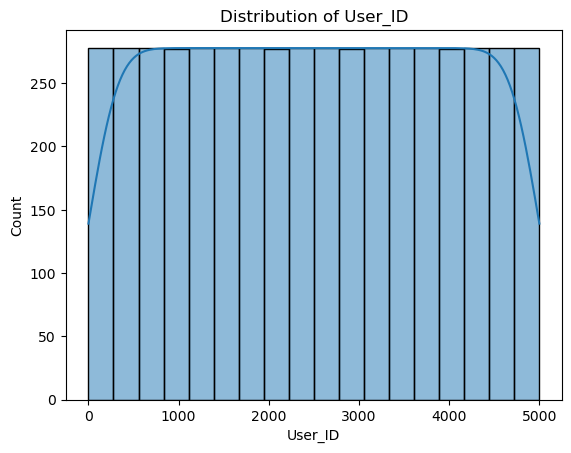

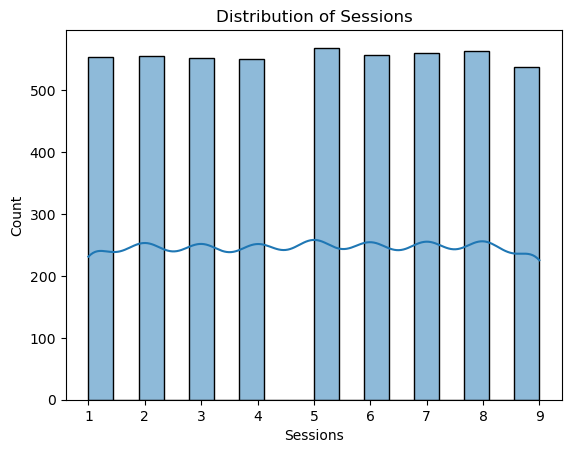

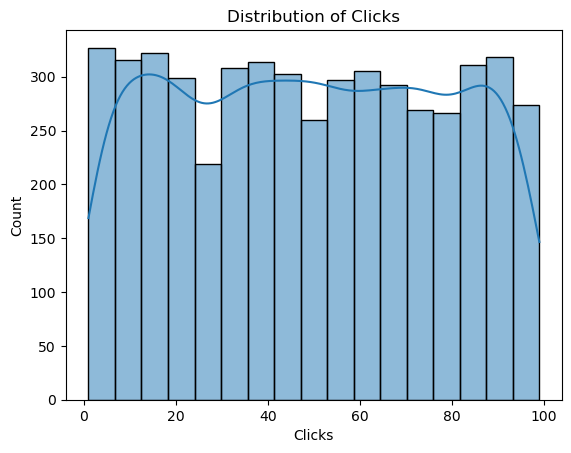

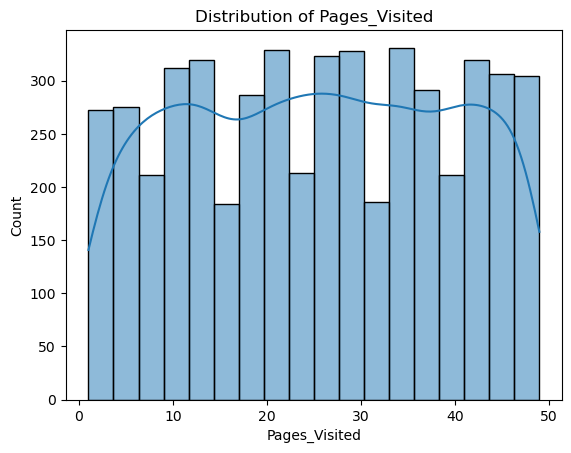

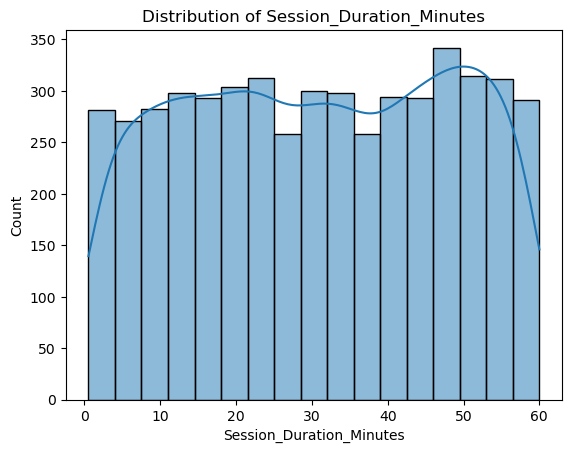

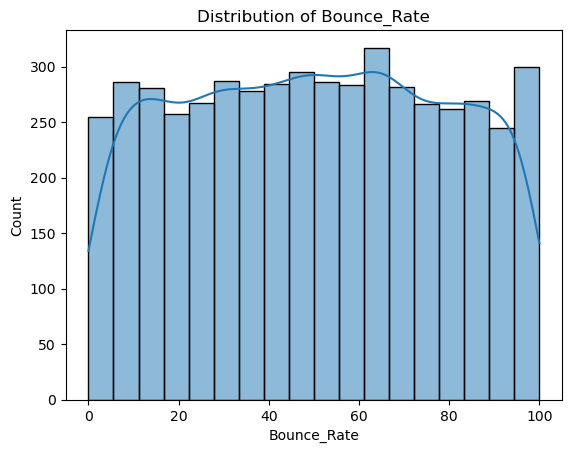

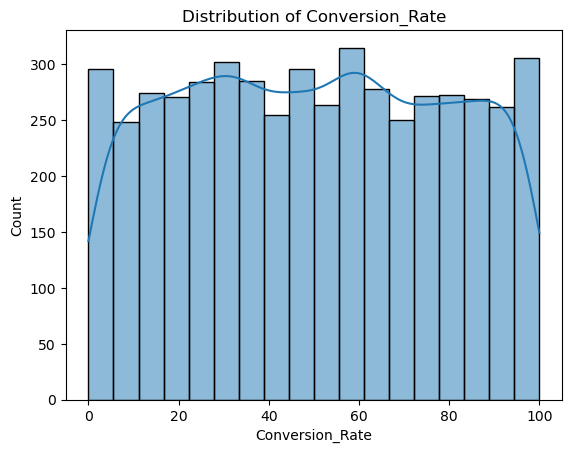

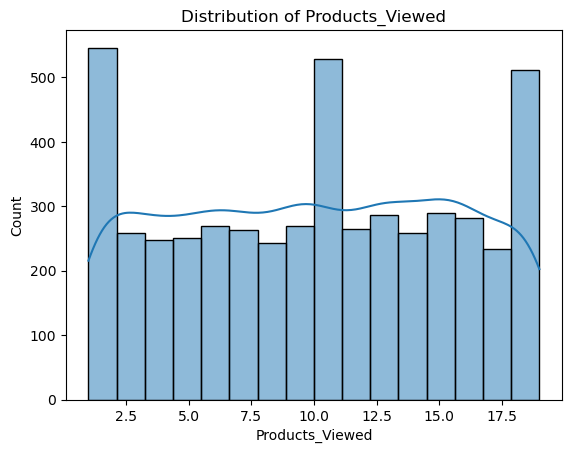

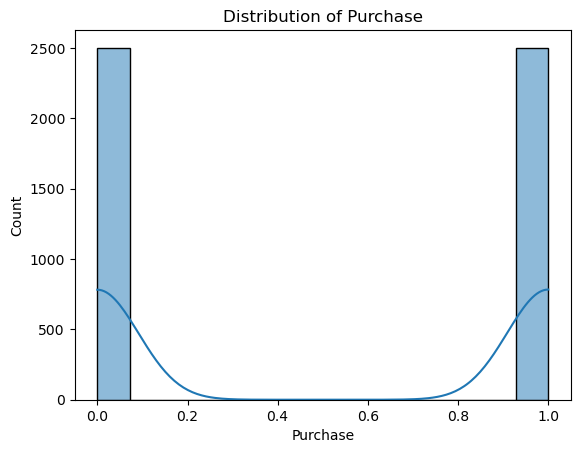

In [244]:
# 📌 7. Exploratory Data Analysis (EDA)

# Plotting distributions of numerical columns
numerical_cols = data.select_dtypes(include=np.number).columns
for col in numerical_cols:
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

<Figure size 2000x600 with 0 Axes>

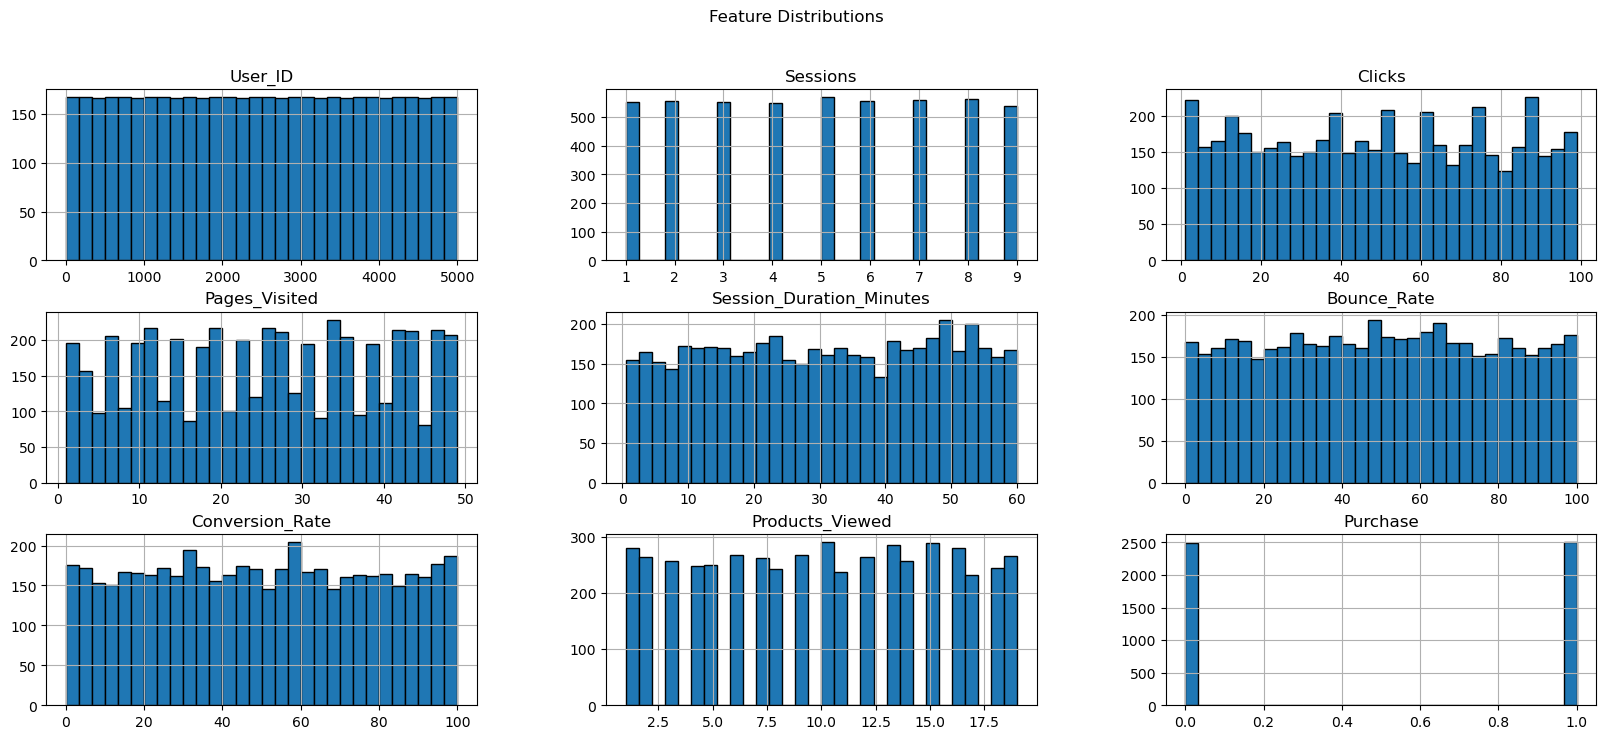

In [245]:
#EDA:Visualizing Data Distributions
plt.figure(figsize=(20,6))
data.hist(bins=30,figsize=(20,8),edgecolor="black")
plt.suptitle("Feature Distributions")
plt.show()

#### 👆🏻 This shows us each variable's that spreads a data across different value range

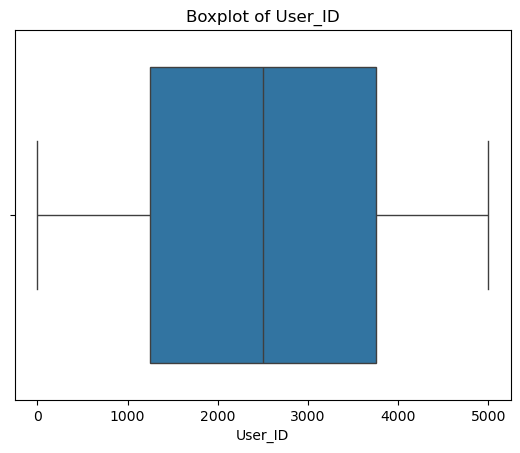

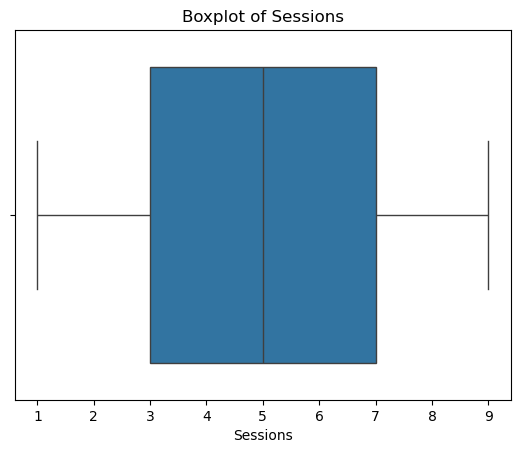

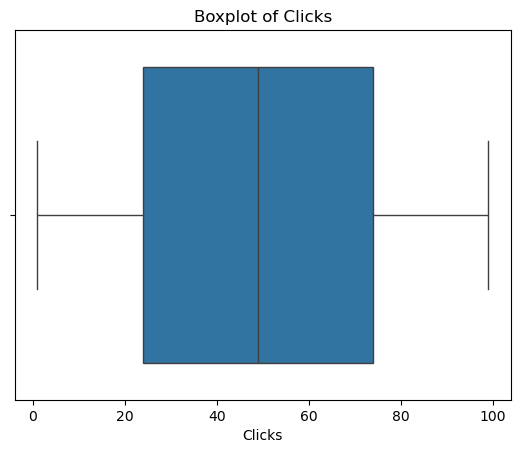

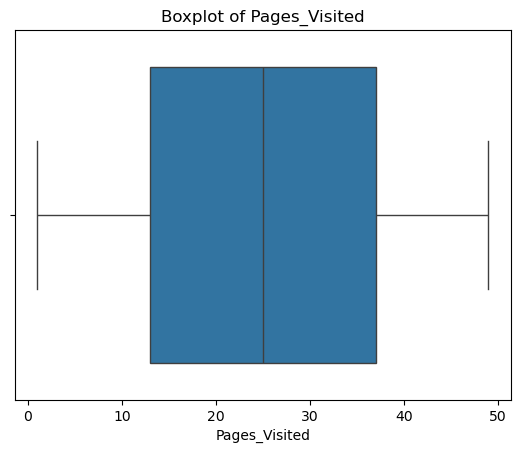

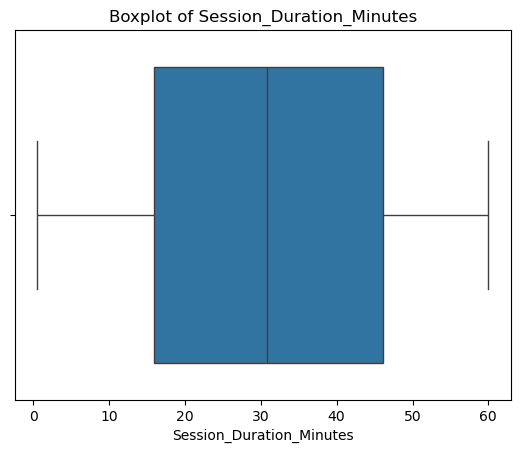

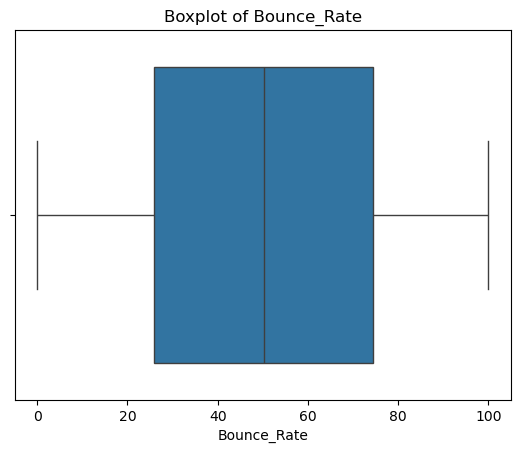

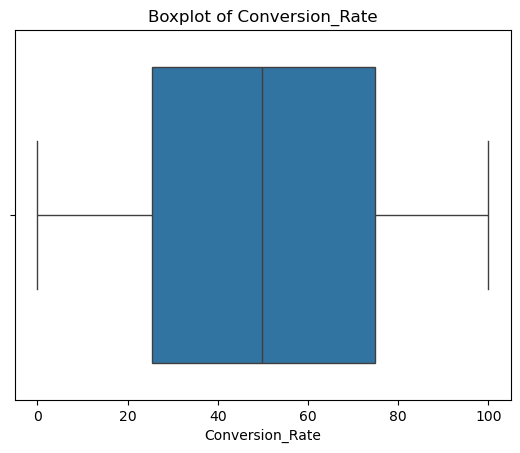

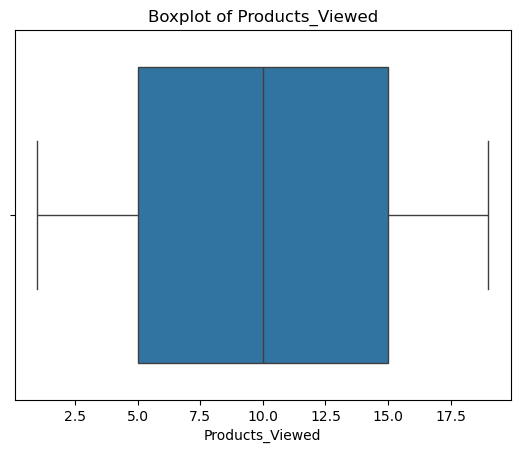

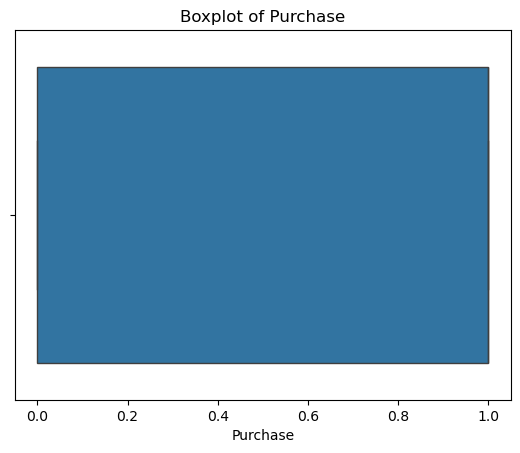

In [192]:
# Box plots for outliers
for col in numerical_cols:
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

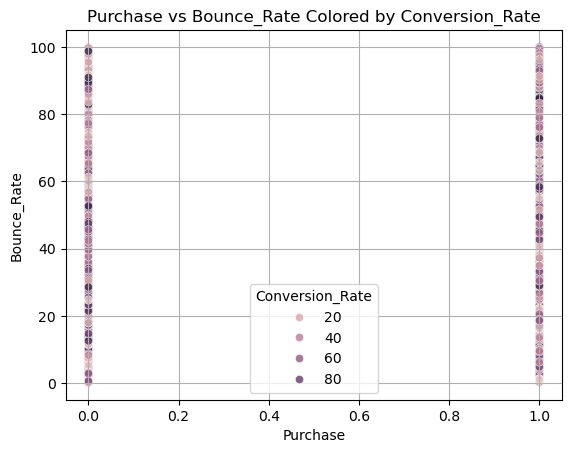

In [249]:
# scatterplot (Purchase vs bonus rate by conversion rate)
sns.scatterplot(x='Purchase', y='Bounce_Rate',hue='Conversion_Rate',  data=data, alpha=0.8)
plt.title('Purchase vs Bounce_Rate Colored by Conversion_Rate')
plt.xlabel('Purchase')
plt.ylabel('Bounce_Rate')
plt.grid(True)
plt.show()

##### ☝️ Scatterplot shows us the relationship between variables and also to find outliers.
- Show a negative or positive trend between Purchase and Conversion_Rate.
- Help us to make business decision, while we notice a Bounce_Rate increases and Conversion_Rate increases.

## 🔥Heatmap - Correlation Matrix

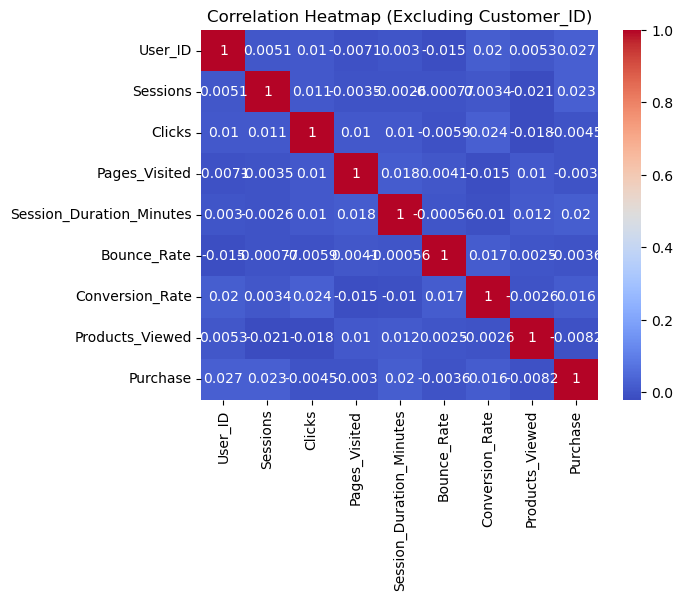

In [253]:
# 📌 8. Correlation Analysis (Updated: Dropping Customer_ID)
# Drop object-type columns like 'Customer_ID' before calculating correlation
data_corr = data.drop(columns=['Customer_ID'], errors='ignore')

# Select only numeric columns
data_corr = data_corr.select_dtypes(include=np.number)

# Compute and plot correlation
corr = data_corr.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Excluding Customer_ID)")
plt.show()

☝️ Correlation matrix helps us to find the most target variable and it shows the high relationship between variables in positive or negative ranges which is useful for predictation, and it detect multicollinearity features.

- +1 = Perfect positive correlation
- -1 = Perfect negative correlation
- 0 = No linear relationship

## 📊 Univariate and Multivariate Analysis

### 🔹 Univariate Analysis
Univariate analysis is a statistical examination of a single variable at the time.it helps to describe the basic characteristics of the data, such as its distribution, central tendency(mean,median,mode),and description(range,variance,standard deviation).

### 🔹 Multivariate Analysis
Multivariate analysis is a statistical technique used to examine the relationship between three or more variables at the same time. it helps to identify patterns, correlations and interactions among variables to understand how they influence each other.

We'll explore both types of analysis using visualizations and summary Summary statistics for key columns like
`Clicks`,`Pages_Visited`,`Session_Duration_Minutes`,`Bouns_Rate`,`Conversion_Rate`,`Product_Viewed`,and`Purchase`.

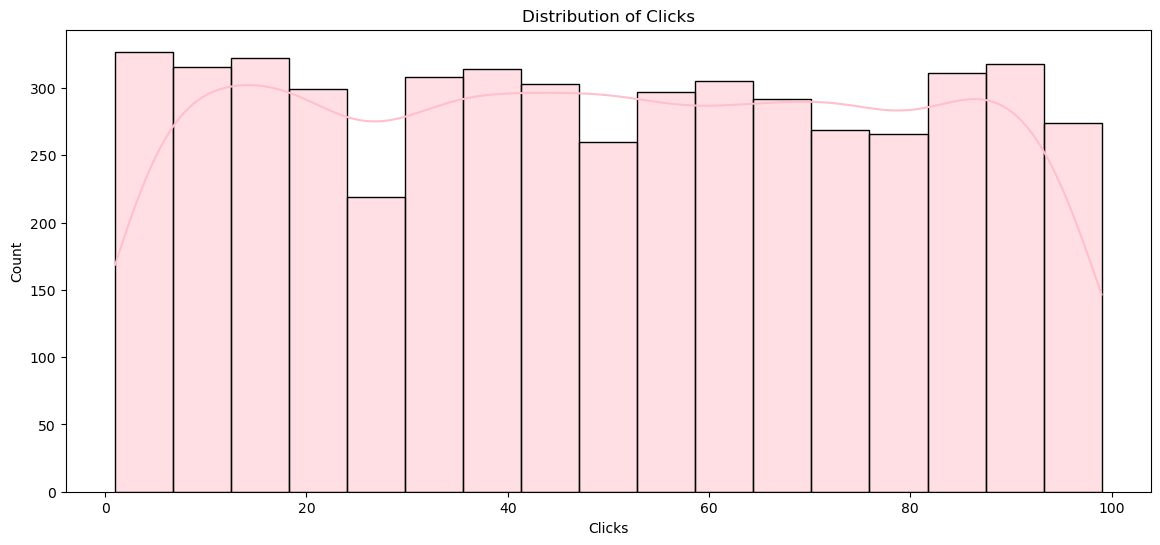

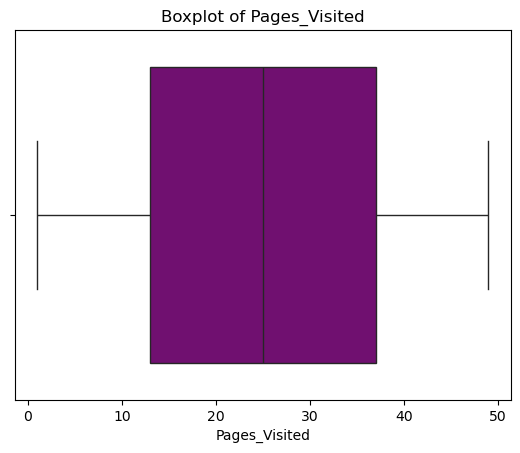

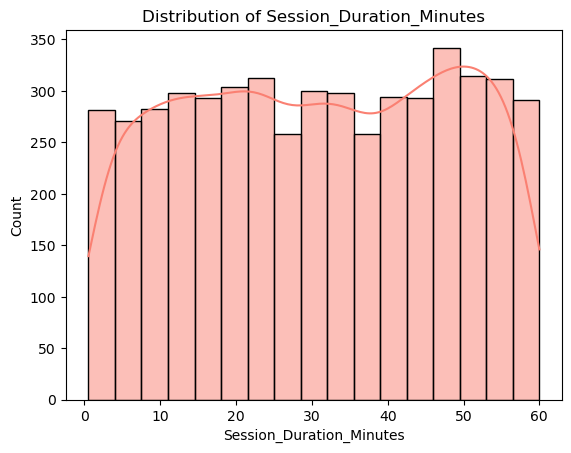

In [257]:
# Univariate Analysis - Distribution plots for numeric variables
plt.figure(figsize=(14, 6))
sns.histplot(data['Clicks'], kde=True, color='pink')
plt.title('Distribution of Clicks')
plt.show()

sns.boxplot(x=data['Pages_Visited'], color='purple')
plt.title('Boxplot of Pages_Visited')
plt.show()

sns.histplot(data['Session_Duration_Minutes'], kde=True, color='salmon')
plt.title('Distribution of Session_Duration_Minutes')
plt.show()

### Univariate Analysis - 📐Categorical variable count plot

C:\Users\Pragathi BR\AppData\Local\Temp\ipykernel_18216\3992106577.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:green'` for the same effect.

  sns.countplot(x='Device', hue="Device", data=data, color='green')


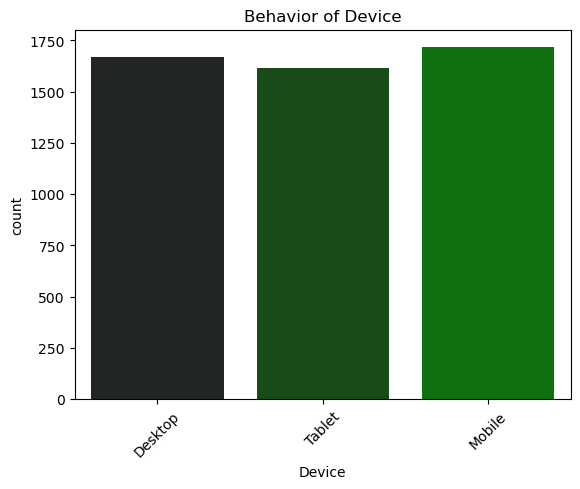

C:\Users\Pragathi BR\AppData\Local\Temp\ipykernel_18216\3992106577.py:7: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:pink'` for the same effect.

  sns.countplot(x='Region', hue='Region',data=data, color='pink')


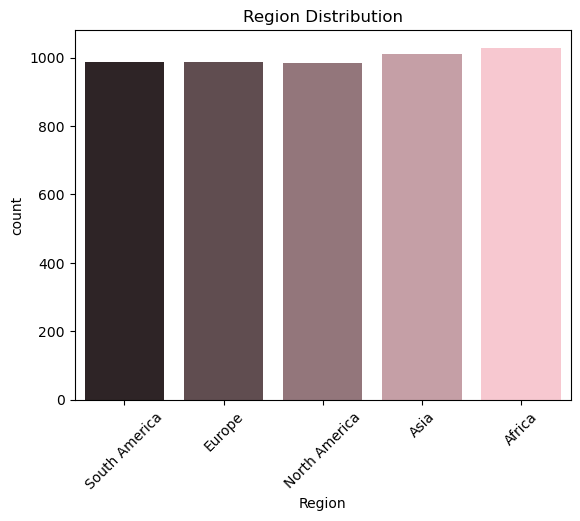

In [20]:
# Univariate Analysis - Categorical variable count plot
sns.countplot(x='Device', hue="Device", data=data, color='green')
plt.title('Behavior of Device')
plt.xticks(rotation=45)
plt.show()

sns.countplot(x='Region', hue='Region',data=data, color='pink')
plt.title('Region Distribution')
plt.xticks(rotation=45)
plt.show()

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   User_ID                   5000 non-null   int64         
 1   Sessions                  5000 non-null   int64         
 2   Clicks                    5000 non-null   int64         
 3   Pages_Visited             5000 non-null   int64         
 4   Session_Duration_Minutes  5000 non-null   float64       
 5   Bounce_Rate               5000 non-null   int32         
 6   Conversion_Rate           5000 non-null   int32         
 7   Products_Viewed           5000 non-null   int32         
 8   Purchase                  5000 non-null   datetime64[ns]
 9   Device                    5000 non-null   object        
 10  Region                    5000 non-null   object        
 11  User_Type                 5000 non-null   object        
dtypes: datetime64[ns](1)

### 👇🏻 Piechat shows has that how much each product category contributes to the whole dataset like:
- Which category sells more.
- Which one to promote.
- Where to focus Devices.

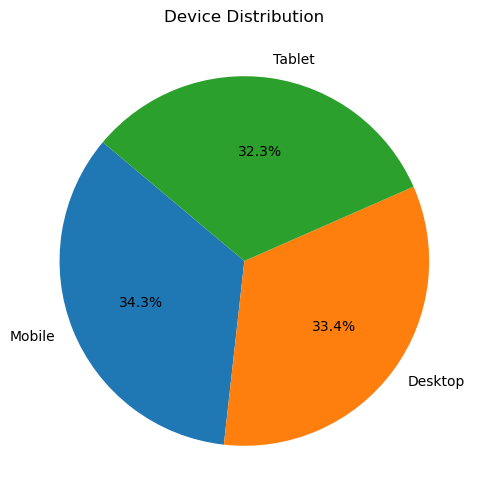

In [38]:
# Univariate Pie Chart: Device distribution
Device_counts = data['Device'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(Device_counts, labels=Device_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Device Distribution')
plt.show()

## Multivariate Analysis - 🌀Pairplot of key numeric features

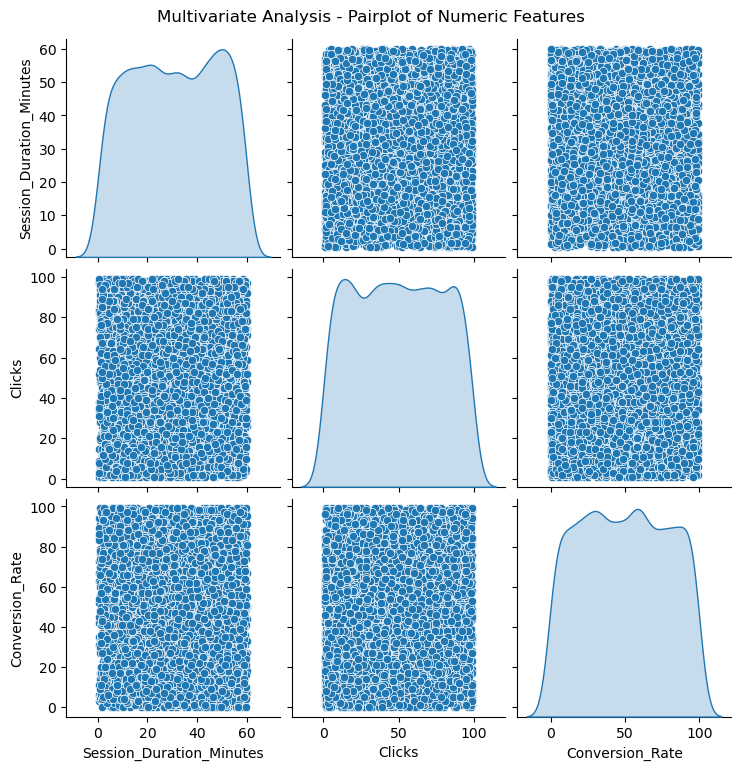

In [130]:
# Multivariate Analysis - Pairplot of key numeric features
sns.pairplot(data[['Purchase', 'Session_Duration_Minutes', 'Clicks', 'Conversion_Rate']], diag_kind='kde')
plt.suptitle('Multivariate Analysis - Pairplot of Numeric Features', y=1.02)
plt.show()

#### 👆🏻 Pair plot is used to Create scatter plots between every pair of numerical features.
- **pairplot** : [Session_Duration_Rate , Clicks , Conversion_Rate , Purchase]

## Multivariate Analysis - 🔥Heatmap for correlation

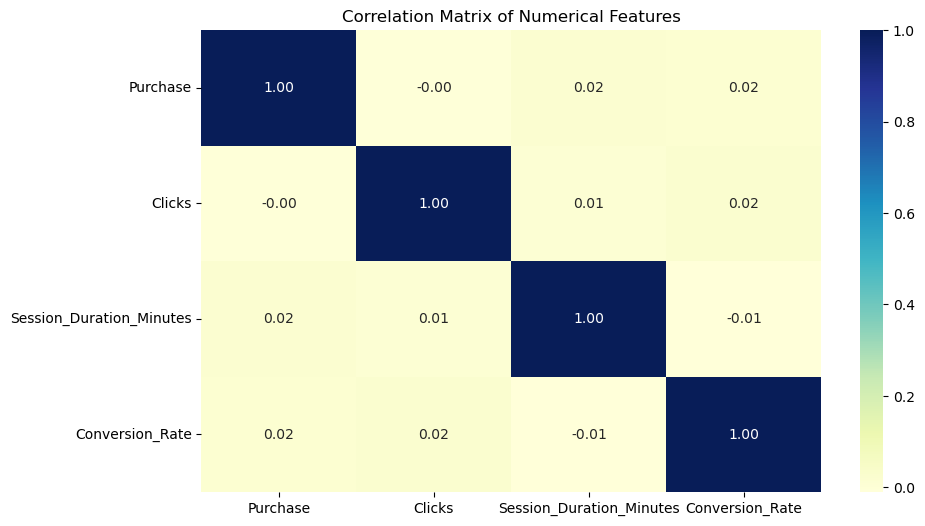

In [262]:
# Multivariate Analysis - Heatmap for correlation
plt.figure(figsize=(10, 6))
corr = data[['Purchase', 'Clicks', 'Session_Duration_Minutes', 'Conversion_Rate']].corr()
sns.heatmap(corr, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

##### ☝This heatmap is meaningful only if categorical variables are converted into numerical variables.

C:\Users\Pragathi BR\AppData\Local\Temp\ipykernel_24160\4001396124.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Device', y='Products_Viewed', data=data, palette='Set2')


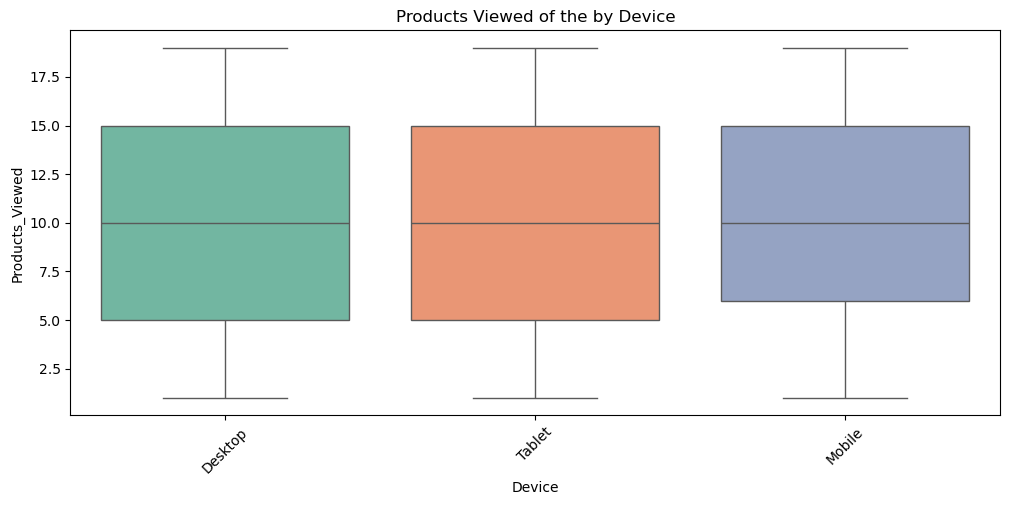

In [265]:
# Multivariate Analysis - Boxplot of Lifetime Value by Region
plt.figure(figsize=(12, 5))
sns.boxplot(x='Device', y='Products_Viewed', data=data, palette='Set2')
plt.title('Products Viewed of the by Device')
plt.xticks(rotation=45)
plt.show()

#### 👆🏻 Boxplot is used to spread data and detect outliers in the dataset and it helps us to find extreme values.
- Helps to compare how Products_Viewed vary with different Device conditions.
- it is useful for identifying inconsistencies in stock levels based on device demand .

## 🎲 Probability & Hypothesis Testing

Here, We:
- Shapiro Test for normality
- T-test or ANOVA: Compare session duration by event type
- Chi-Square Test: Relationship between event type and product Category
- Validate assumptions like "Do products is different categories which is "mobile vs laptop" have significantly different average prices?"



## 📙Probability Distribution Analysis

It is a process of understanding how values in a column are distributed meaning how frequently they occur and how they behave across the data set. To understand how certain numerical variables behave across the user behaviors,product prizes, categories and user sessions. so analyze the probability distribution helps  you to understand customer behavior, product pricing patterns, business strategy, trends, and  detect patterns.


## 🏷Columns Chosen:
- **Session_Duration_Minutes**- How long users spend during a session.
- **Conversion_Rate**- How effective the platform is at turning views into buys.
- **Bounce_Rate**-percent Of users who leave after one interaction.
- **Clicks**- Which users are most engaged.
- **Purchases**- Buying behavior across users.

Each variable is visualized below with both histogram and normal distribution fit


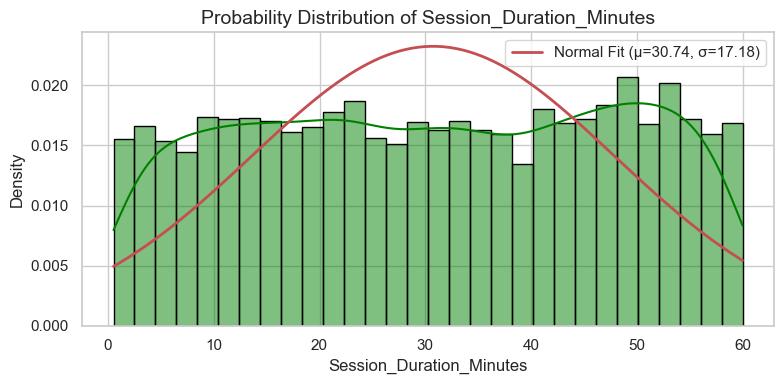

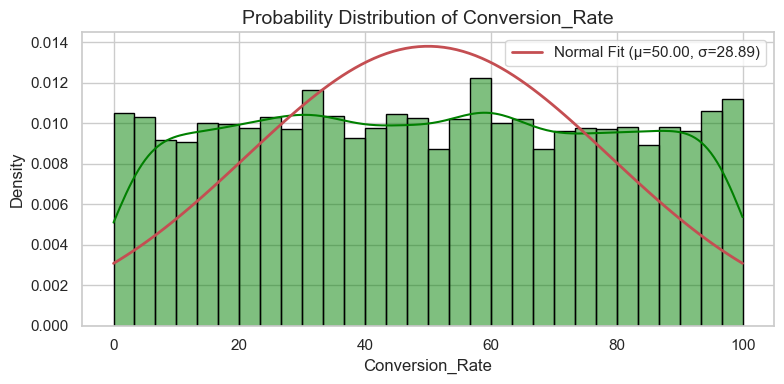

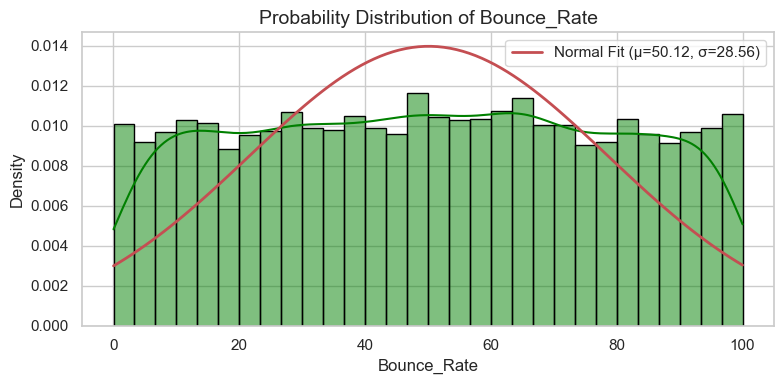

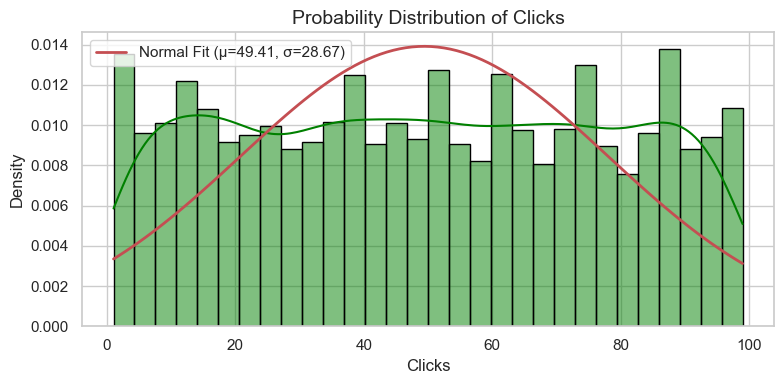

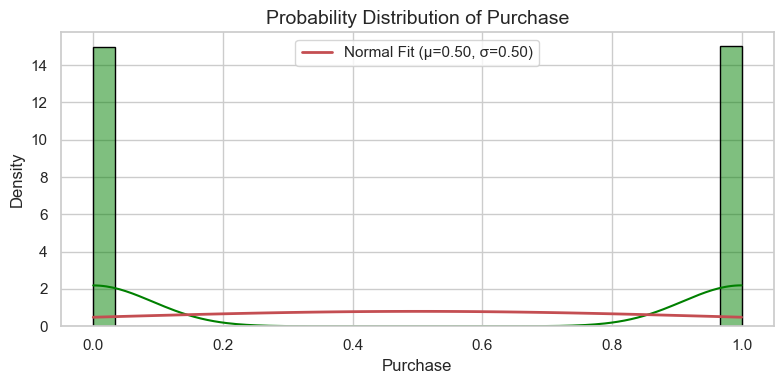

In [270]:
# Set the style for all plots
sns.set(style="whitegrid")

# Columns selected for probability distribution
columns_to_analyze = ['Session_Duration_Minutes','Conversion_Rate','Bounce_Rate','Clicks','Purchase']

# Plotting histogram with KDE and normal distribution fit
for col in columns_to_analyze:
    plt.figure(figsize=(8, 4))
    
    # Plot histogram and KDE
    sns.histplot(data[col], kde=True, stat="density", bins=30, color="green", edgecolor="black")
    
    # Fit normal distribution to the data
    mean, std = norm.fit(data[col])
    x = np.linspace(data[col].min(), data[col].max(), 100)
    p = norm.pdf(x, mean, std)
    
    # Plot fitted normal distribution
    plt.plot(x, p, 'r', linewidth=2, label=f'Normal Fit (μ={mean:.2f}, σ={std:.2f})')
    
    # Titles and labels
    plt.title(f'Probability Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.legend()
    plt.tight_layout()
    plt.show()


## 📝Hypothesis Testing
   by doing t-Test, chi-square test that helps us to make data-driven decisions by Statistically evaluating patterns assumptions and differences in data.

In [272]:
# 📌 11. Hypothesis Testing

# Choose two regions
region1 = data[data['Region'] == 'North']['Session_Duration_Minutes']
region2 = data[data['Region'] == 'South']['Session_Duration_Minutes']

# Perform independent two-sample t-test
t_stat, p_value = ttest_ind(region1, region2)

print("T-Statistic:", t_stat)
print("P-Value:", p_value)

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject Null Hypothesis: There is a significant difference in Average Order Value between North and South regions.")
else:
    print("Fail to Reject Null Hypothesis: No significant difference found.")


T-Statistic: nan
P-Value: nan
Fail to Reject Null Hypothesis: No significant difference found.


## 📑Simple Linear Regression

We predict `Conversion_Rate` using `Bounce_Rate` to Understand how prices is affects in Products. 

In [276]:
# 📌 9. Simple Linear Regression (Example)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# Independent (X) and dependent (y) variables
X = data[['Conversion_Rate']]  # must be 2D for skLearn
y = data['Bounce_Rate']

# Create and fit the model
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [278]:
# Predict values
y_pred = lin_reg.predict(X)

In [280]:
y_pred

array([49.6107294 , 50.47521701, 49.80839531, ..., 50.74184468,
       49.74502769, 50.11282712])

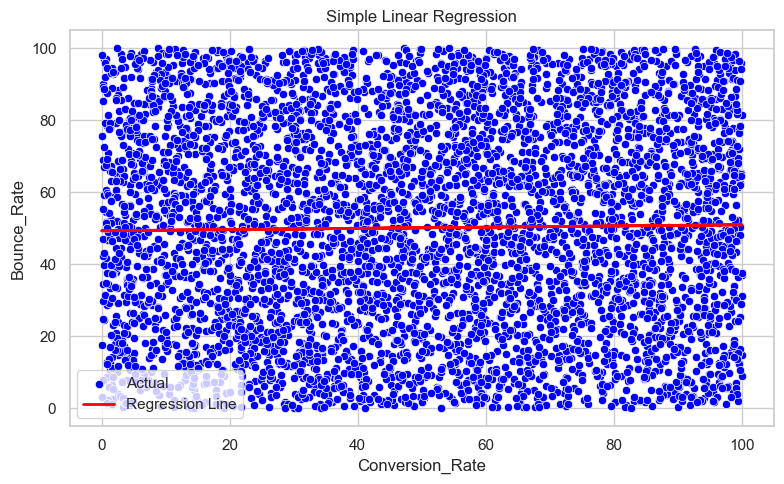

In [282]:
# Plotting regression line
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X['Conversion_Rate'], y=y, color='blue', label='Actual')
plt.plot(X['Conversion_Rate'],y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Conversion_Rate')
plt.ylabel('Bounce_Rate')
plt.title('Simple Linear Regression')
plt.legend()
plt.tight_layout()
plt.show()

In [284]:
# Display coefficients
print("Intercept:", lin_reg.intercept_)
print("Slope:", lin_reg.coef_[0])

Intercept: 49.280092033529755
Slope: 0.016731517138996402


## 📑Multiple Linear Regression

We now use tow variables to predict `Bounce_Rate` to improve our production accuracy and capture more user behavior.

In [287]:
# 📌 10. Multiple Linear Regression (Example)

# Define features and target
features = ['Conversion_Rate', 'Purchase']
X = data[features]
y = data['Bounce_Rate']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train model
mlr = LinearRegression()
mlr.fit(X_train, y_train)

LinearRegression()

In [289]:
# Predict
y_pred = mlr.predict(X_test)

In [291]:
y_pred

array([50.2582044 , 49.05001977, 50.30918921, 50.55997393, 50.52160887,
       49.52916551, 49.63203813, 49.64341357, 49.79886124, 50.19622811,
       49.93153571, 49.47939315, 50.36406185, 49.85201642, 50.55043025,
       49.08664665, 50.42648922, 49.34615044, 49.6176836 , 49.33332521,
       49.19279303, 50.51777394, 50.04902024, 49.80386424, 50.38879927,
       50.30047268, 50.16647465, 50.04323244, 50.2737358 , 50.31026656,
       50.27544293, 49.14581546, 49.40481221, 49.71324466, 50.5396729 ,
       50.08928668, 49.66546902, 49.5004304 , 49.58115553, 49.0352563 ,
       49.90774579, 49.33727183, 49.90098976, 50.04775917, 50.60158884,
       50.07725814, 49.56368213, 50.58108744, 50.49565985, 50.53213736,
       49.23851551, 49.62077252, 49.35874137, 49.22371245, 50.16330455,
       49.39923303, 49.48929356, 50.05191794, 49.79346315, 49.78982333,
       49.61845607, 49.82646689, 49.88650376, 49.19323827, 50.60815701,
       49.9746797 , 49.51652449, 49.57390263, 49.0893299 , 50.21

In [293]:
# Evaluation metrics
print("Intercept:", mlr.intercept_)
print("Coefficients:", dict(zip(features, mlr.coef_)))
print("R-squared:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Intercept: 49.015922791748174
Coefficients: {'Conversion_Rate': 0.015883883981316252, 'Purchase': 0.02683512314669126}
R-squared: -0.0021528539391071355
RMSE: 29.257751131650785


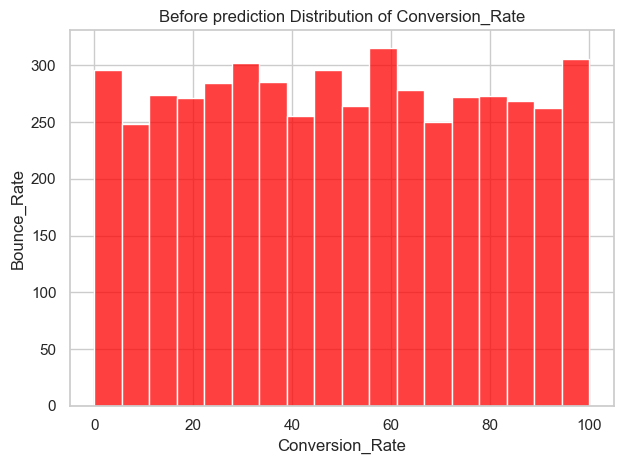

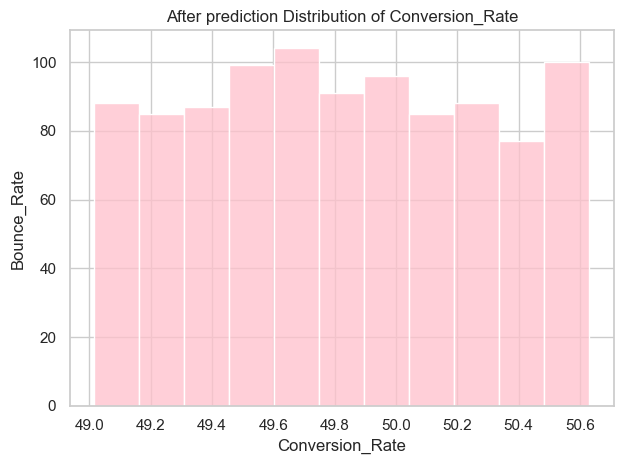

In [295]:
sns.histplot(data["Conversion_Rate"],color="red")
plt.title("Before prediction Distribution of Conversion_Rate")
plt.xlabel("Conversion_Rate")
plt.ylabel("Bounce_Rate")
plt.tight_layout()
plt.show()

sns.histplot(y_pred,color="pink")
plt.title("After prediction Distribution of Conversion_Rate")
plt.xlabel("Conversion_Rate")
plt.ylabel("Bounce_Rate")
plt.tight_layout()
plt.show()

## 📑Hypothesis Testing

We perform a T-test to see if there is a significant difference in the `Session_Duration_Minutes`of Users from the North vs South region.

In [297]:
#📌 11. Hypothesis Testing

# Choose two regions
region1 = data[data['Region'] == 'North']['Session_Duration_Minutes']
region2 = data[data['Region'] == 'South']['Session_Duration_Minutes']

# Perform independent two-sample t-test
t_stat, p_value = ttest_ind(region1, region2)

print("T-Statistic:", t_stat)
print("P-Value:", p_value)

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject Null Hypothesis: There is a significant difference in Average Order Value between North and South regions.")
else:
    print("Fail to Reject Null Hypothesis: No significant difference found.")


T-Statistic: nan
P-Value: nan
Fail to Reject Null Hypothesis: No significant difference found.


## 📏 Model Evaluation

We evaluated the models using the following techniques:

- **R_squared**: Measures how well the regression  model explains the variation in the dependent variable.
-  **P-values**: Determines the statistical significance of each predictor.


##  🗒Interpretation:
- The  **Simple and Multiple Linear Regerssion Models** revealed how `Conversion_Rate` , `Purchase` and `Session_Duration_Minutes` impact `Bounce_Rate`.


## ✅ Final Conclusion

In this project, **"E-commerce User Behavior Analysis using Statistical and Predictive Techniques"** We explored a comprehensive dataset using a core statistical techniques to extract meaningful business insights.
Here's  a summary of our findings:

###  🗝Key Takeaways:
- **Descriptive statistics** Help us to understand the dataset using basic statistical measures which includes central tendencies and variation in purchase patterns and user behaviors and majority of actions fewer purchases. This data set provides valuable insights into user browsing patterns which can be used for further statistical modeling and business analysis.it includes a variety of product categories such as electronics, applianceS, computers with brands like Samsung and Apple appearing frequently.
- **Probability distributions** (Normal, binomial) Were explored on selected columns like `Session_Duration_Minutes` and `Conversion_Rate`, revealing Distribution tendencies useful for modeling. Race distribution are essential for selecting the correct statistical models and tests, understanding customer behavior and design effective marketing strategies.
- **Correlation analysis** Indicated strong relationship, expatriate between the `Conversion_Rate` and `Bonuce_Rate` can you please sales performance which is further valuated using regression.
-  **Simple and Multiple Linear Regression** Modest demonstrated that `Conversion_Rate`, `Purcahse`significantly contribute to predicting users `Bonus_Rate`, With respectable R-squared values.
-  **Hypothesis testing** helped validate assumptions, ensuring the statistical robustness of our Conclusions.

### 📈 Business Interpretation:
- Customer journey insights- The majority of users only view products without progressing to purchase. there's a significant drop off between views and purchases which eyelets potential conversion funnel leakage. Tracking user flow from due to purchase can help identify where users lose interest
- Product Performance- a small number of products received the highest views and purchase which confirming the 80/20 around 20% of products drive 80% of engagement. Price has moderate positive correlation with purchase right, indicating that users are willing to Pay more for certain brands or categories like Electronics and smartphones.
- Brand and Category Impact- Certain brands in categories dominate user interest for example smartphones, laptops kitchen appliances. This high engagement categories are ideal targets for future listenings, promotions are bundled details

### 🎯Final Verdict 


This analysis provides a strong statistical foundational **User_Behavioral**,
**Product_Viewed**,**Purchases** and **Bonus_Rate**. This project bridges the cap between raw data and actionable business intelligence
This statistical analysis uncovers key behavior- Price relationships:
- Simple behavior metrics have predictive value but aren't sufficient alone
- Combining multiple interaction signals improves business predictions
- the business should invest in behavior analytics, conversion tracking and advanced models
  
